# Задача 3e

In [2]:
import math
import matplotlib.pyplot as plt
import copy
import numpy as np
from scipy.optimize import fsolve

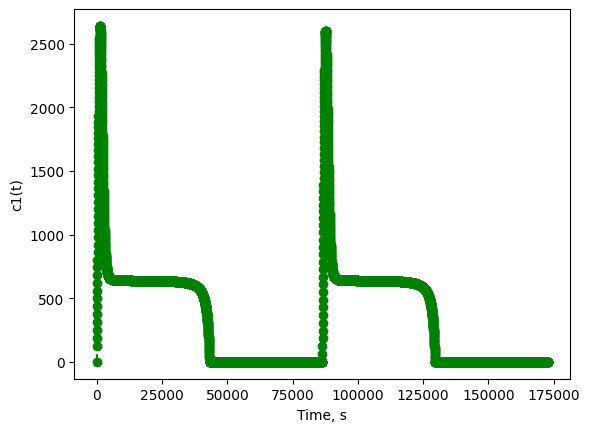

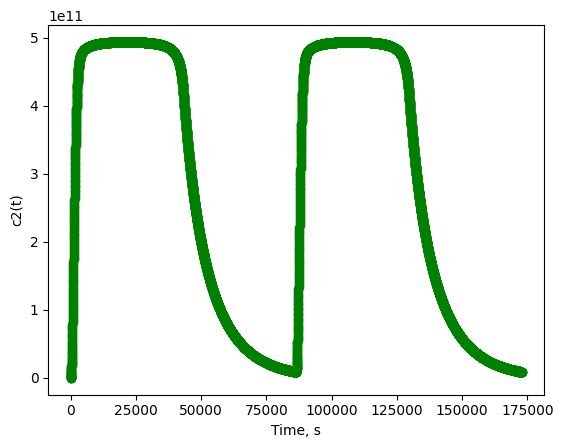

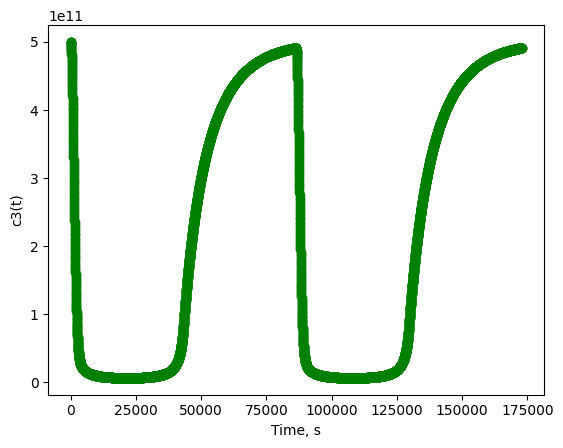

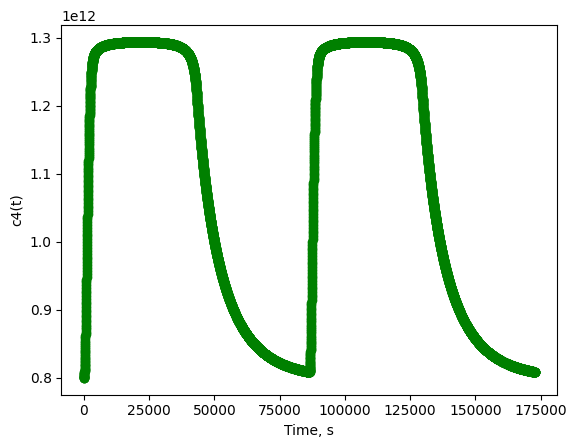

In [77]:
td = 24 * 60 * 60
steps = 10000
ts = 2 * td / steps
y = np.array([[1.0] * 4 for i in range(steps)])
y[0] = np.array([0, 0, 5e11, 8e11])
k2 = 1e5
k3 = 1e-16
a = math.sqrt(2) / 2
b = 1 - a

def k1(t):
    return 1e-2 * max(0, math.sin(2 * math.pi * t / td))

def f(T, y):
    a1n = k1(T) * y[2] - k2 * y[0]
    b1n = k1(T) * y[2] - k3 * y[1] * y[3]
    c1n = k3 * y[1] * y[3] - k1(T) * y[2]
    d1n = k2 * y[0] - k3 * y[1] * y[3]
    
    return np.array([a1n, b1n, c1n, d1n])

def find_y1(p, yp, T1):
    y1 = np.array(p)
    return (y1 - yp - ts * b * f(T1, y1))

def find_y2(p, yp, y1, T1, T2):
    y2 = np.array(p)
    return (y2 - yp - ts * a * f(T1, y1) - ts * b * f(T2, y2))
    
for i in range(1, steps):
    T1 = (b + i) * ts # tn + b * delta_t
    T2 = (1 + i) * ts # tn + delta_t
    y1 = np.array([0.0] * 4)
    y2 = np.array([0.0] * 4)
    y1 = fsolve(find_y1, (1, 1, 1, 1), (y[i - 1], T1))
    y2 = fsolve(find_y2, (1, 1, 1, 1), (y[i - 1], y1, T1, T2))
    y[i] = y[i - 1] + ts * a * f(T1, y1) + ts * b * f(T2, y2)

x = np.array([ts * j for j in range(0, steps)])
y1 = np.array([y[i][0] for i in range(steps)])
y2 = np.array([y[i][1] for i in range(steps)])
y3 = np.array([y[i][2] for i in range(steps)])
y4 = np.array([y[i][3] for i in range(steps)])
plt.plot(x, y1, 'go', linestyle = '--')
plt.xlabel("Time, s")
plt.ylabel("c1(t)")
plt.show()

plt.plot(x, y2, 'go', linestyle = '--')
plt.xlabel("Time, s")
plt.ylabel("c2(t)")
plt.show()

plt.plot(x, y3, 'go', linestyle = '--')
plt.xlabel("Time, s")
plt.ylabel("c3(t)")
plt.show()

plt.plot(x, y4, 'go', linestyle = '--')
plt.xlabel("Time, s")
plt.ylabel("c4(t)")
plt.show()

# Explicit euler method

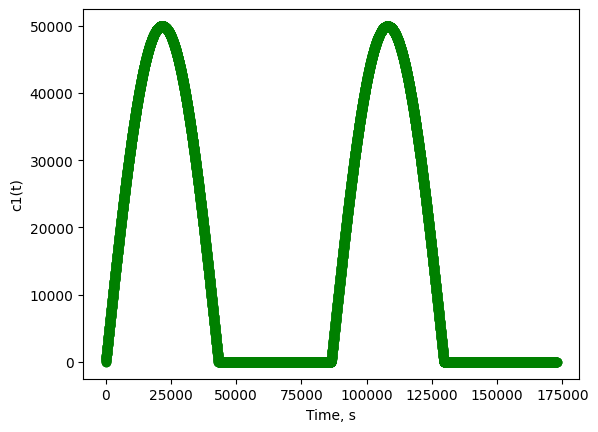

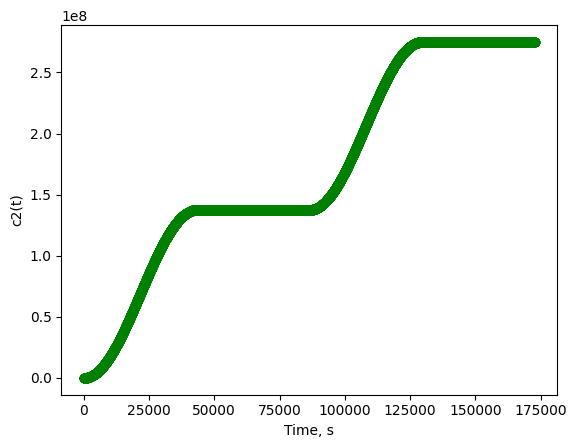

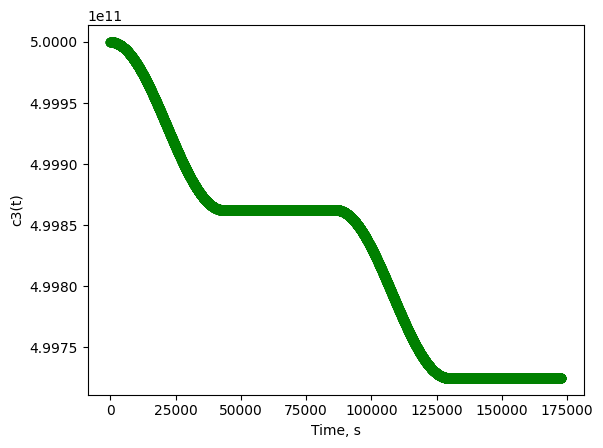

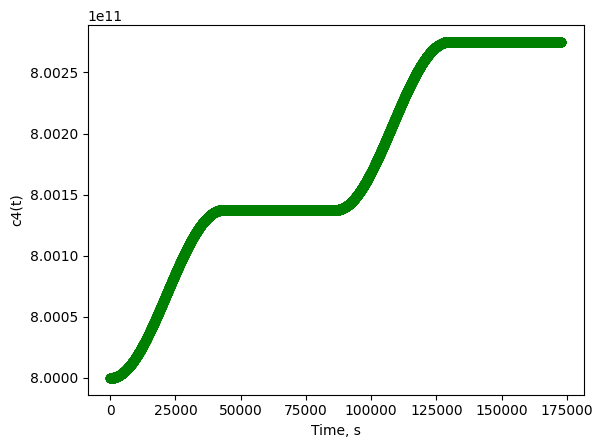

In [84]:
y = np.array([[1.0] * 4 for i in range(steps)])
y[0] = np.array([0, 0, 5e11, 8e11])
esteps = 1e10;
ets = 2 * td / esteps;

for i in range(1, steps):
    pt = ts * (i - 1)
    y[i] = y[i - 1] + ets * f(pt, y[i - 1])

x = np.array([ts * j for j in range(0, steps)])
y1 = np.array([y[i][0] for i in range(steps)])
y2 = np.array([y[i][1] for i in range(steps)])
y3 = np.array([y[i][2] for i in range(steps)])
y4 = np.array([y[i][3] for i in range(steps)])
plt.plot(x, y1, 'go', linestyle = '--')
plt.xlabel("Time, s")
plt.ylabel("c1(t)")
plt.show()

plt.plot(x, y2, 'go', linestyle = '--')
plt.xlabel("Time, s")
plt.ylabel("c2(t)")
plt.show()

plt.plot(x, y3, 'go', linestyle = '--')
plt.xlabel("Time, s")
plt.ylabel("c3(t)")
plt.show()

plt.plot(x, y4, 'go', linestyle = '--')
plt.xlabel("Time, s")
plt.ylabel("c4(t)")
plt.show()

Максимальный шаг по времени в явном методе Эйлера ~ 0.2 мкс  
Максимальный шаг по времени в диагольнано-неявном методе Рунге-Кутты любой